# Data Visualization

### Importar bibliotecas

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats

### importar os dados

In [5]:
#Importando os dados
df = pd.read_csv('data/train.csv')

In [6]:
#Checando os dados
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#Checando os dados
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Analisando as variáveis

Pensando em quais variáveis são importantes para a compra de uma casa (OverallQual, YearBuilt, TotalBsmtSF, GrLivArea)
Há descrição no bloco de notas

### Analisando 'SalePrice'

In [8]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Importante notar que não temos valores nulos o que não atrapalhará nosso modelo. Mesma coisa podemos notar a baixo

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Gerando algumas visibilidades

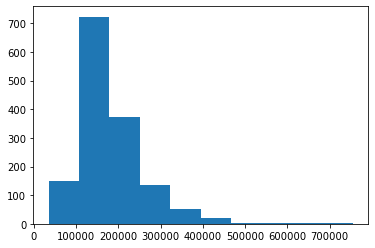

In [10]:

#Histograma
plt.figure()
plt.hist(df['SalePrice'])
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

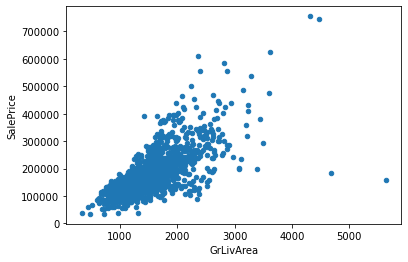

In [11]:
#scatter plot grlivarea/salesprice
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

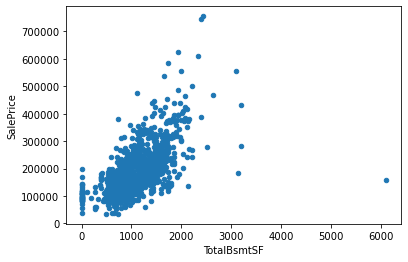

In [12]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

#### Relationship with categorical features

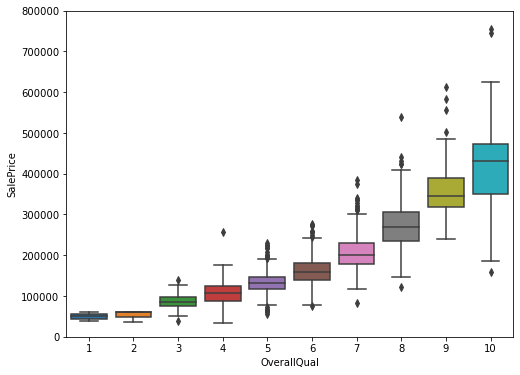

In [13]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot( x=data[var], y=data['SalePrice'] )
fig.axis(ymin=0, ymax=800000);

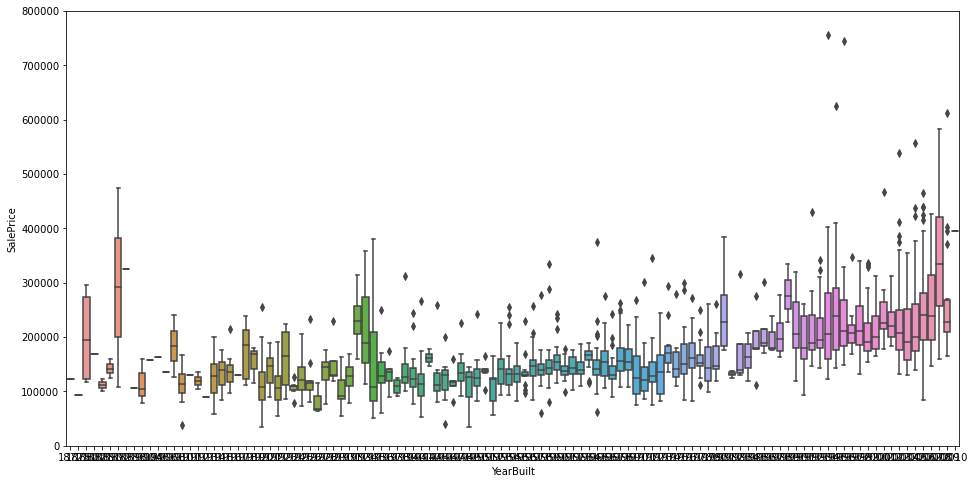

In [14]:
var = 'YearBuilt'
#data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot( x=df[var], y=df['SalePrice'] )
fig.axis(ymin=0, ymax=800000);

# Correlações

To explore the universe, we will start with some practical recipes to make sense of our 'plasma soup':

- Correlation matrix (heatmap style).
- 'SalePrice' correlation matrix (zoomed heatmap style).
- Scatter plots between the most correlated variables (move like Jagger style).

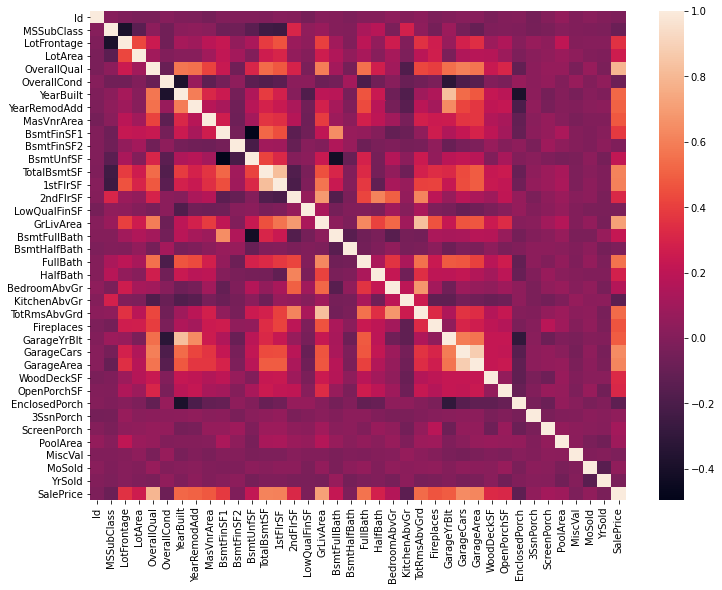

In [15]:
# Matrix de correlação
corrmat = df.corr()  #Criar a correlação entre as variáveis
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat)
plt.show()

#Jeito rápido de ter uma rápida visão
# Visão desejada é a ultima linha ('SalePrice')


### 'SalePrice' correlation matrix (zoomed heatmap style)

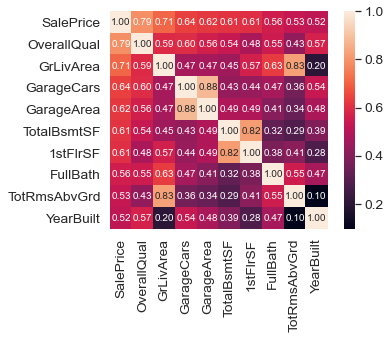

In [16]:
#Saleprice correlation matrix
k = 10 #numero de variáveis do heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Scatter plots like a god

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


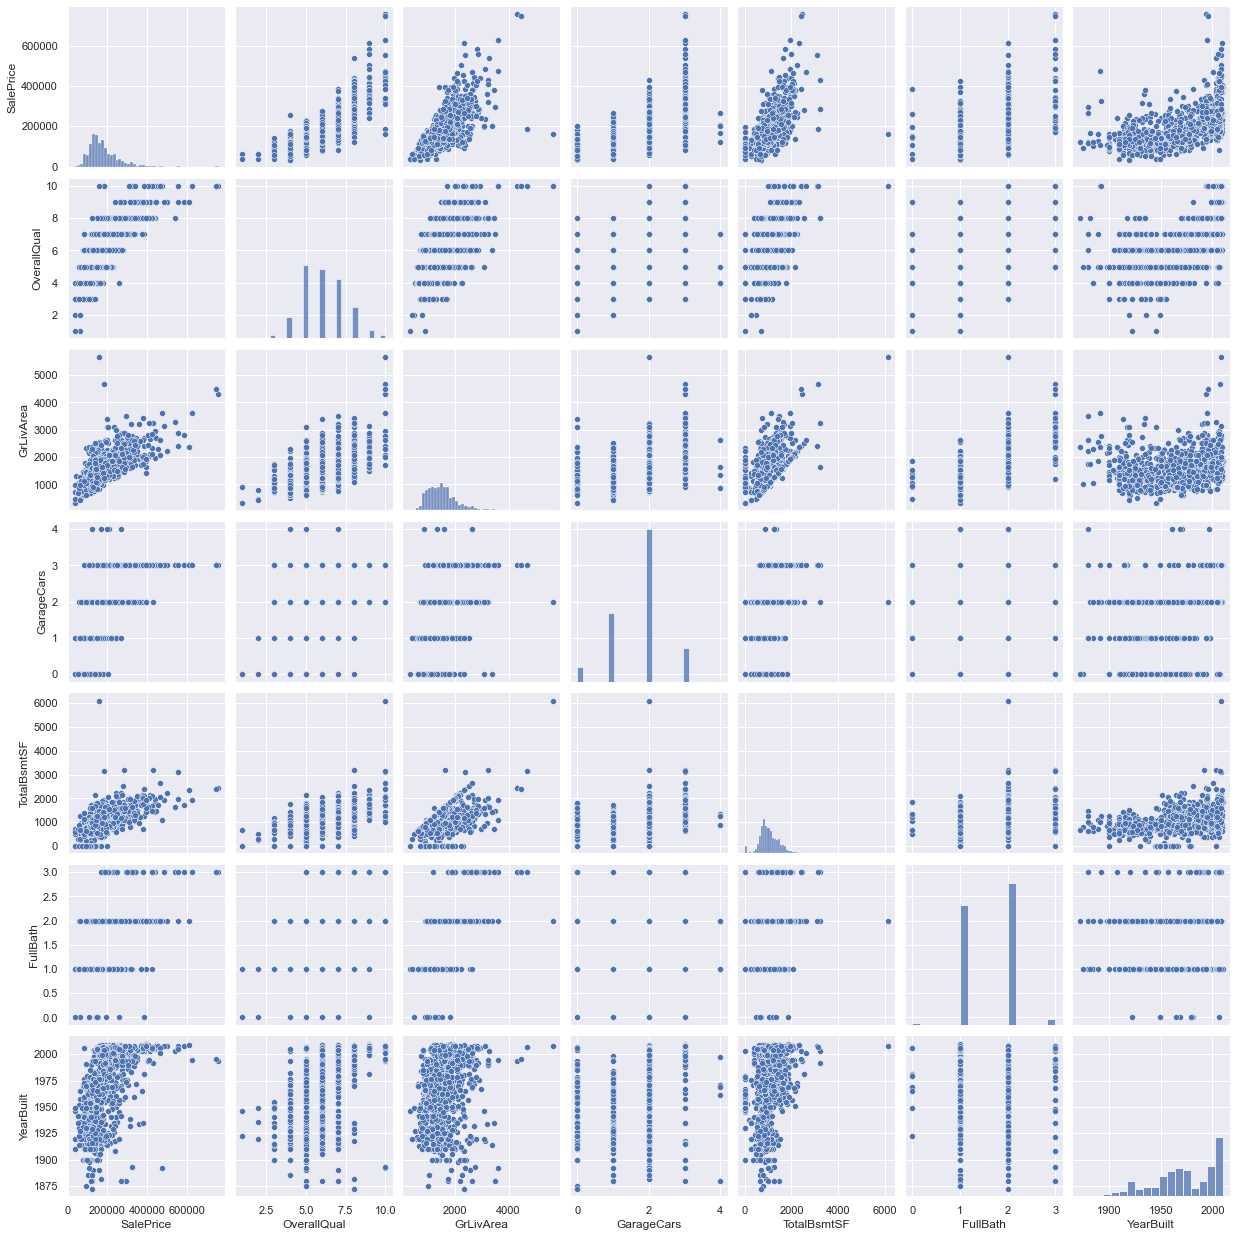

In [17]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

# Missing Data

In [18]:
# Uma forma de ver as colunas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
#VISUALIZAÇÃO DADOS VAZIOS
df.isnull().sum().max()

1453

In [20]:
#DADOS FALTANTES
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [21]:
#TRATANDO DADOS FALTANTES
df_train = df.drop((missing_data[missing_data['Total'] > 1]).index, inplace=True, axis=1) #Excluindo coluna
df_train = df.drop(df.loc[df['Electrical'].isnull()].index) #Excluido linha
df_train.isnull().sum().max() #Apenas checando se não há dados faltantes

0

## OUT LIARS

Para falar de outliars é necessário padronizar os dados.
### Analise de uma variante

In [22]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


<ipython-input-22-4d8c1f0ba9e5>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);


Como fica 'SalePrice':

- Os valores do intervalo baixo são semelhantes e não muito distantes de 0.
- Os valores da faixa alta estão longe de 0 e os valores de 7 alguma coisa estão realmente fora da faixa.

### Analises de duas variáveis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

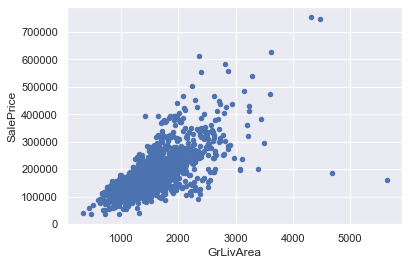

In [23]:
# ANALISE DE DUAS VARIÁVEIS (SALEPRICE/GRLIVAREA)
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

#### Deletando outliars

In [24]:
#Deletando pontos
df_train.sort_values(by='GrLivArea', ascending = False)
df_train = df_train.drop(df_train[df_train['GrLivArea']> 4000].index)
#df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

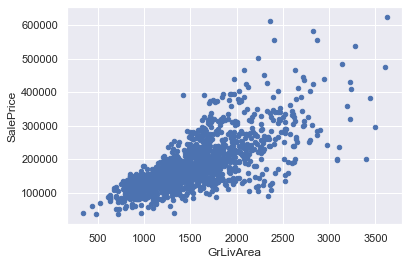

In [25]:
#APENAS PARA COMPROVAR QUE OS VALORES FORAM REMOVIDOS
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

# HARD CORE

- Normalidade - Quando falamos em normalidade, o que queremos dizer é que os dados devem parecer uma distribuição normal. Isso é importante porque vários testes estatísticos dependem disso (por exemplo, estatísticas t). Neste exercício, vamos apenas verificar a normalidade univariada para 'SalePrice' (que é uma abordagem limitada). Lembre-se de que a normalidade univariada não garante a normalidade multivariada (que é o que gostaríamos de ter), mas ajuda. Outro detalhe a levar em consideração é que em grandes amostras (> 200 observações) a normalidade não é um problema. No entanto, se resolvermos a normalidade, evitaremos muitos outros problemas (por exemplo, heterocedacidade), então essa é a principal razão pela qual estamos fazendo esta análise.

- Homocedasticidade - Só espero ter escrito certo. Homocedasticidade refere-se à 'suposição de que a (s) variável (is) dependente (s) exibem níveis iguais de variância em toda a gama de variável (s) preditor (es)' (Hair et al., 2013). A homocedasticidade é desejável porque queremos que o termo de erro seja o mesmo em todos os valores das variáveis ​​independentes.

- Linearidade- A maneira mais comum de avaliar a linearidade é examinar gráficos de dispersão e procurar padrões lineares. Se os padrões não forem lineares, valeria a pena explorar as transformações de dados. No entanto, não entraremos nisso porque a maioria dos gráficos de dispersão que vimos parecem ter relações lineares.

- Ausência de erros correlacionados - Erros correlacionados, como sugere a definição, acontecem quando um erro é correlacionado a outro. Por exemplo, se um erro positivo comete um erro negativo sistematicamente, significa que há uma relação entre essas variáveis. Isso ocorre frequentemente em séries temporais, onde alguns padrões estão relacionados ao tempo. Também não vamos entrar nisso. No entanto, se você detectar algo, tente adicionar uma variável que possa explicar o efeito que você está obtendo. Essa é a solução mais comum para erros correlacionados

#### Procurando a distribuição normal

O objetivo aqui é testar 'SalePrice' de uma forma muito enxuta. Faremos isso prestando atenção a:

- Histograma - curtose e assimetria.
- Gráfico de probabilidade normal - a distribuição de dados deve seguir de perto a diagonal que representa a distribuição normal.

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


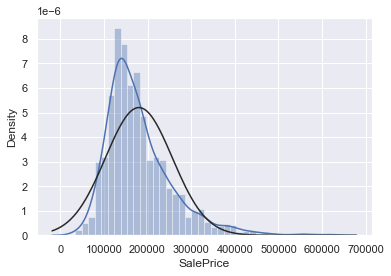

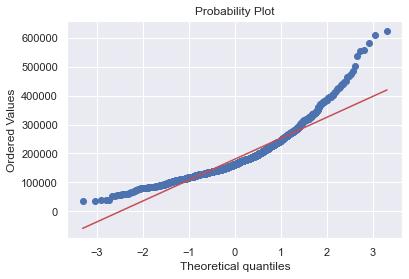

In [31]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)